Step 1. Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. Read Dataset

In [ ]:
telecom_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/refs/heads/master/Datasets/churn-bigml-80.csv',
                         header = 0, sep = ',')

In [ ]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


3. Data Wrangling

In [ ]:
telecom_df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [ ]:
le_encoder.fit(telecom_df['International plan'])

LabelEncoder()

In [ ]:
telecom_df['International plan'] = le_encoder.transform(telecom_df['International plan'])

In [ ]:
le_encoder.fit(telecom_df['Voice mail plan'])

LabelEncoder()

In [ ]:
telecom_df['Voice mail plan'] = le_encoder.transform(telecom_df['Voice mail plan'])

4. Is there any Multi-Collinearity ?

In [ ]:
telecom_df.drop('State', axis = 1, inplace = True)

In [ ]:
telecom_df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,0.047099,0.007180,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
International plan,0.024500,0.047099,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,-0.010310,0.018081,-0.010316,0.053162,0.011549,0.053037,-0.035955,0.277489
Voice mail plan,0.002448,0.007180,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,0.001065,0.013985,0.001066,-0.013963,0.015196,-0.013931,-0.022054,-0.099291
Number vmail messages,-0.002996,-0.000584,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.004277,-0.007541,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.049555,0.013439,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.026616,0.019132,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.010277,0.003404,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539


<Axes: >

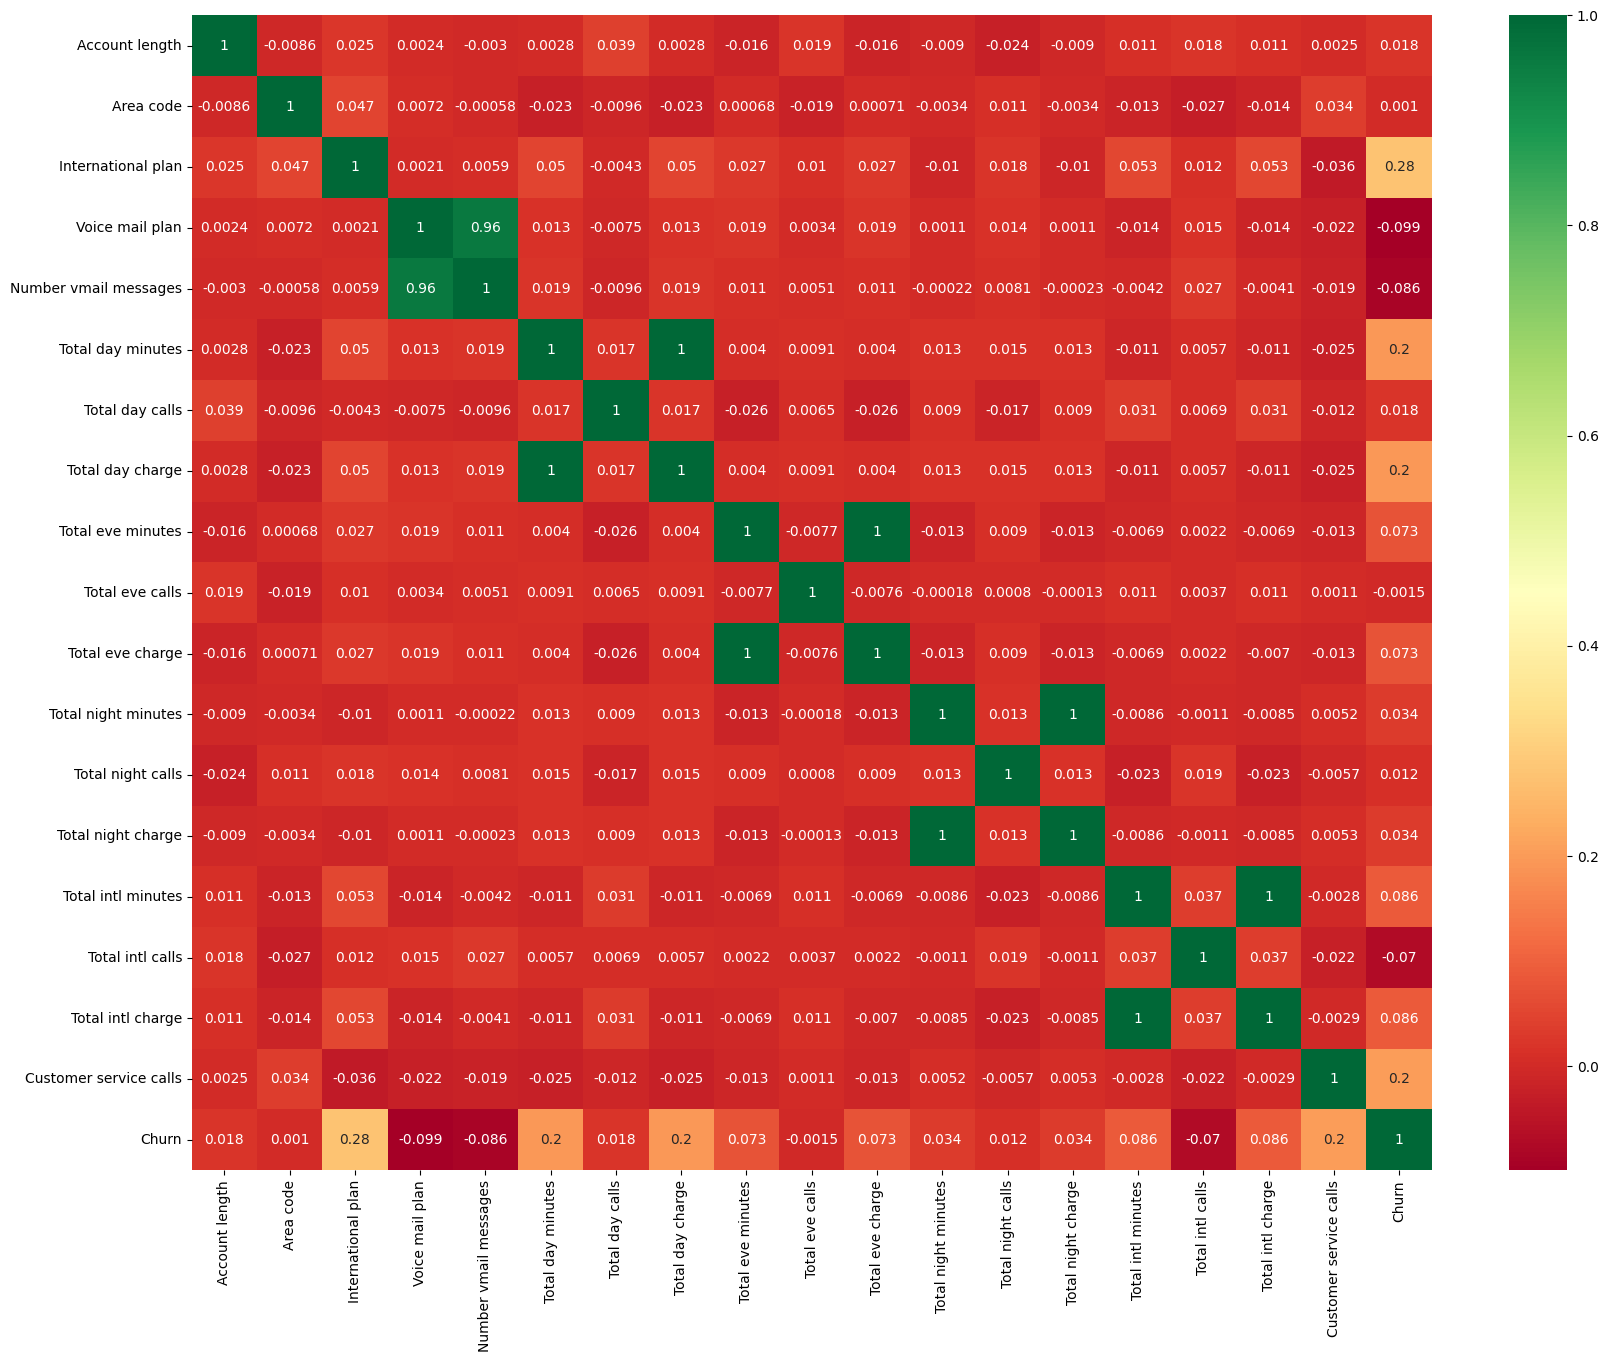

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(telecom_df.corr(), annot = True, cmap = 'RdYlGn')

In [ ]:
telecom_df.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

5. Features & Labels

In [ ]:
X = telecom_df.drop(['Account length','Voice mail plan','Total day charge','Total eve charge','Total night charge','Total intl charge','Churn'],
                    axis = 1)
Y = telecom_df['Churn']

6. Is there any Imbalanced Class ?

In [ ]:
outcome_count = telecom_df['Churn'].value_counts()
outcome_count

,count
Churn,
False,2278
True,388


<Axes: xlabel='Churn'>

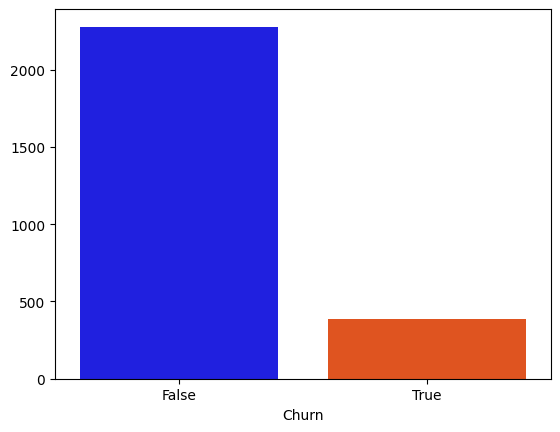

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.barplot(x = outcome_count.index, y = outcome_count.values, palette=['blue','orangered'])

7. Upsample Data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature, transformed_label = oversample.fit_resample(X,Y)

In [ ]:
transformed_label.value_counts()

,count
Churn,
False,2278
True,2278


8. Split into train & test sample

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_feature, transformed_label, test_size = 0.2, random_state = 3)

9. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# hyperparameter tuning - criterion : 'entropy' or 'gini' impurity
# max_depth = limit of decision the tree to prrevent overfitting (pruining)
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 2, max_depth = 11)

In [ ]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=2)

In [ ]:
clf_tree.score(x_test, y_test)

0.8596491228070176

In [ ]:
clf_tree.score(x_train, y_train)

0.9259055982436882

In [ ]:
clf_tree.get_depth()

11

10. Decision Tree Plot

In [ ]:
import graphviz
from sklearn import tree

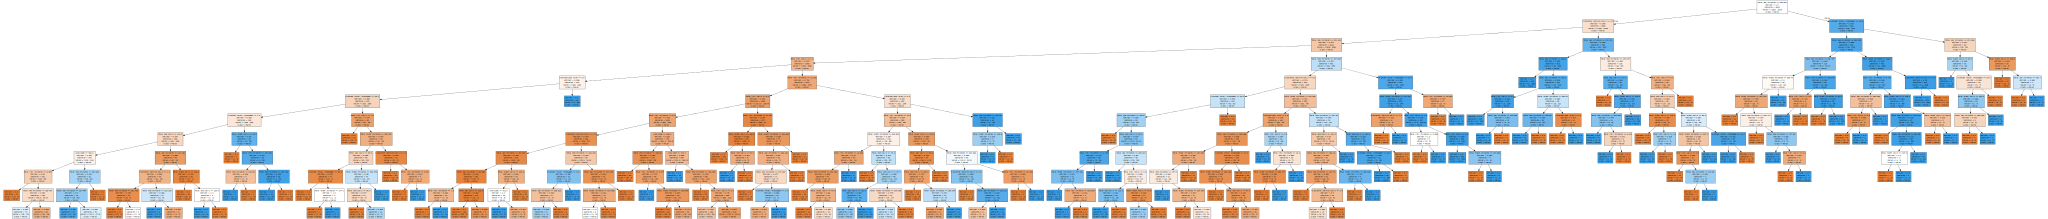

In [ ]:
dot_data = tree.export_graphviz(clf_tree, feature_names=X.columns, class_names= Y.astype('str').values, filled = True)
graph = graphviz.Source(dot_data, format = 'png')
graph

10. Classification Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
prediction = clf_tree.predict(x_test)

In [ ]:
confusion_matrix(y_test, prediction)

array([[396,  55],
       [ 73, 388]])

<Axes: >

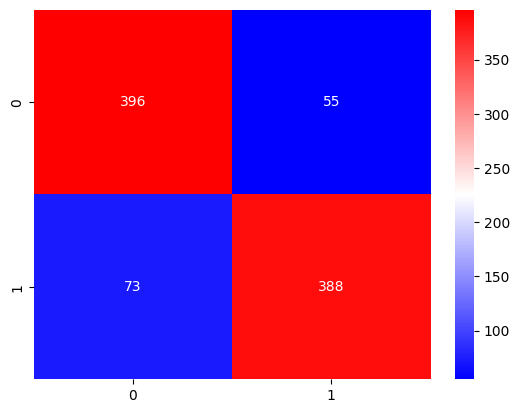

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot =True, cmap = 'bwr', fmt = '0.0f')

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.84      0.88      0.86       451
        True       0.88      0.84      0.86       461

    accuracy                           0.86       912
   macro avg       0.86      0.86      0.86       912
weighted avg       0.86      0.86      0.86       912



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# n_estimators = Num of Decision Trees
# bootstrap = True : Random Sampling of data with duplicate samples
# criterion : 'entropy' or 'gini'
# max_features : number of features = 5
clf_rf = RandomForestClassifier(bootstrap = True, n_estimators = 50, max_features = 5, criterion = 'entropy')

In [ ]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=50)

In [ ]:
clf_rf.score(x_test, y_test)

0.9385964912280702

#### Classification Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
prediction = clf_rf.predict(x_test)

In [ ]:
confusion_matrix(y_test, prediction)

array([[436,  15],
       [ 41, 420]])

<Axes: >

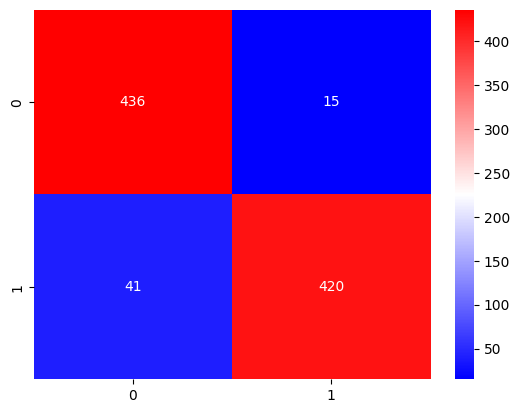

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot =True, cmap = 'bwr', fmt = '0.0f')

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94       451
        True       0.97      0.91      0.94       461

    accuracy                           0.94       912
   macro avg       0.94      0.94      0.94       912
weighted avg       0.94      0.94      0.94       912

